<a href="https://colab.research.google.com/github/catmalark/Tensorflow-My-Practices/blob/main/Cifar10_ConvNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img
import csv
import string
import os

In [3]:
cifar10 = tf.keras.datasets.cifar10

(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
training_images.shape

(50000, 32, 32, 3)

In [5]:
training_labels.shape

(50000, 1)

In [6]:
training_images = np.array(training_images).astype(np.float64)
training_labels = np.array(training_labels).astype(np.float64)
test_images = np.array(test_images).astype(np.float64)
test_labels = np.array(test_labels).astype(np.float64)

In [7]:
training_images_splitted = training_images[0:45000, :, :, :]
validation_images = training_images[45000:50001, :, :, :]

training_labels_splitted = training_labels[0:45000]
validation_labels = training_labels[45000:50001]

print(training_images_splitted.shape)
print(training_labels_splitted.shape)

print(validation_images.shape)
print(validation_labels.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


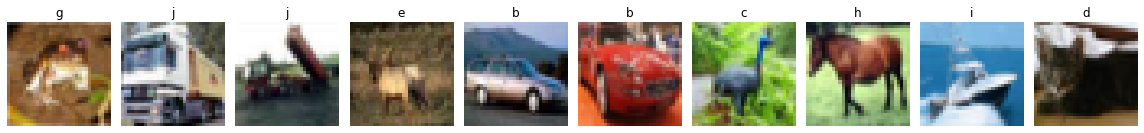

In [8]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
   # img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    #fill_mode='nearest'
)

train_generator = train_datagen.flow(
    x = training_images_splitted,
    y = training_labels_splitted.reshape(-1,),
    batch_size=64,
)

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow(
    x = validation_images,
    y = validation_labels.reshape(-1,),
    batch_size=64,
)

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow(
    x = test_images,
    y = test_labels.reshape(-1,),
    batch_size=64,
)

In [10]:
print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")
print(f"Images of test generator have shape: {test_generator.x.shape}")
print(f"Labels of test generator have shape: {test_generator.y.shape}")

Images of training generator have shape: (45000, 32, 32, 3)
Labels of training generator have shape: (45000,)
Images of validation generator have shape: (5000, 32, 32, 3)
Labels of validation generator have shape: (5000,)
Images of test generator have shape: (10000, 32, 32, 3)
Labels of test generator have shape: (10000,)


In [28]:
model = keras.models.Sequential([
                                 
                        layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
                        layers.MaxPooling2D(2,2),

                        layers.Conv2D(64, (3,3), activation="relu"),
                        layers.MaxPooling2D(2,2),

                        layers.Flatten(),
                        layers.Dense(512, activation="relu"),
                        layers.Dropout(0.2),
                        layers.Dense(256, activation="relu"),
                        layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer = keras.optimizers.Nadam(),
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_9 (Dense)             (None, 512)              

In [13]:
#Callback Function
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') >= 0.999: 
                print("\nReached 99.9% accuracy so cancelling training!") 
                self.model.stop_training = True

In [32]:
callbacks = myCallback()

history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks=[callbacks]
)

Epoch 1/30
704/704 [==============================] - 21s 30ms/step - loss: 0.9680 - accuracy: 0.6581 - val_loss: 0.9461 - val_accuracy: 0.6654
Epoch 2/30
704/704 [==============================] - 21s 30ms/step - loss: 0.9433 - accuracy: 0.6668 - val_loss: 0.9538 - val_accuracy: 0.6700
Epoch 3/30
704/704 [==============================] - 21s 29ms/step - loss: 0.9326 - accuracy: 0.6704 - val_loss: 0.9831 - val_accuracy: 0.6552
Epoch 4/30
704/704 [==============================] - 21s 30ms/step - loss: 0.9247 - accuracy: 0.6710 - val_loss: 0.9219 - val_accuracy: 0.6758
Epoch 5/30
704/704 [==============================] - 21s 29ms/step - loss: 0.9144 - accuracy: 0.6751 - val_loss: 0.9130 - val_accuracy: 0.6730
Epoch 6/30
704/704 [==============================] - 21s 30ms/step - loss: 0.9035 - accuracy: 0.6802 - val_loss: 0.8856 - val_accuracy: 0.6904
Epoch 7/30
704/704 [==============================] - 21s 29ms/step - loss: 0.8876 - accuracy: 0.6860 - val_loss: 0.9039 - val_accuracy:

In [33]:
model.evaluate(test_generator)

157/157 [==============================] - 1s 5ms/step - loss: 0.8915 - accuracy: 0.7043


[0.8915425539016724, 0.7042999863624573]

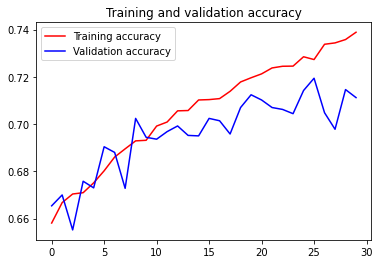

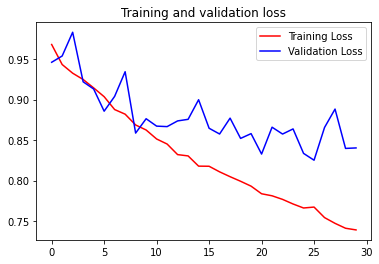

In [34]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
os.makedirs("/tmp/images")

In [35]:
#Now upload and predict your image
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
  # predicting images
  path = '/tmp/images/' + i
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if np.argmax(classes) == 0:
    print(i + " is a airplane")
  elif np.argmax(classes) == 1:
    print(i + " is a automobile")
  elif np.argmax(classes) == 2:
    print(i + " is a bird")
  elif np.argmax(classes) == 3:
    print(i + " is a cat")
  elif np.argmax(classes) == 4:
    print(i + " is a deer")
  elif np.argmax(classes) == 5:
    print(i + " is a dog")
  elif np.argmax(classes) == 6:
    print(i + " is a frog")
  elif np.argmax(classes) == 7:
    print(i + " is a horse")
  elif np.argmax(classes) == 8:
    print(i + " is a ship")
  elif np.argmax(classes) == 9:
    print(i + " is a truck")

['IMG_1155.jpeg', 'horse-g1edc8d965_640.jpg', 'container-ship-gae728fb2e_640.jpg', 'airplane-gd8ec3136a_640.jpg']

[2.4982530e-03 2.8027028e-03 1.1723215e-04 6.7341946e-02 1.4310023e-03
 2.1427411e-04 4.3904290e-01 1.2964636e-02 6.6511840e-02 4.0707529e-01]
IMG_1155.jpeg is a frog

[0.20701957 0.01417127 0.12916261 0.04563205 0.18949091 0.02598176
 0.00053256 0.25531358 0.11207481 0.02062091]
horse-g1edc8d965_640.jpg is a horse

[7.9568309e-01 1.1016434e-02 7.9263380e-05 7.9885888e-07 2.2719996e-05
 5.9751534e-07 1.7163408e-08 2.7076512e-06 1.5462010e-01 3.8574338e-02]
container-ship-gae728fb2e_640.jpg is a airplane

[1.4295566e-01 3.5361737e-01 9.8942379e-03 1.1114230e-03 1.0280871e-02
 1.2179960e-04 1.3563050e-04 3.5135937e-03 1.8780912e-01 2.9056025e-01]
airplane-gd8ec3136a_640.jpg is a automobile
